In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CSV file
csv_file_path = 'IHME-GBD_2021_DATA-72716b14-1/IHME-GBD_2021_DATA-72716b14-1.csv'
csv_data = pd.read_csv(csv_file_path)

# Load Excel files
excel_file_paths = [
    'nhe23-tables/new table 1 total expenditures.xlsx',
    'nhe23-tables/new table 2 expenditures total amount.xlsx',
    'nhe23-tables/new table 3 source of funds.xlsx',
    'nhe23-tables/new table 5 type of sponsors.xlsx'
]

excel_data = {}
for file_path in excel_file_paths:
    excel_data[file_path] = pd.read_excel(file_path)

# Display the data
print("CSV Data:")
print(csv_data.head())

CSV Data:
  measure_name  cause_id                               cause_name metric_name  \
0       Deaths       410                                Neoplasms      Number   
1       Deaths       410                                Neoplasms        Rate   
2       Deaths       344  Neglected tropical diseases and malaria      Number   
3       Deaths       344  Neglected tropical diseases and malaria        Rate   
4       Deaths       626                Musculoskeletal disorders      Number   

   year            val          upper          lower  
0  1980  451711.372800  463715.356900  429850.261000  
1  1980     196.520742     201.743174     187.009885  
2  1980     125.931132     136.190930     115.011189  
3  1980       0.054787       0.059251       0.050037  
4  1980    4875.554196    5017.673641    4627.440970  


In [3]:
print("\nExcel Data:")
for file_path, data in excel_data.items():
    print(f"\nData from {file_path}:")
    print(data.head())


Excel Data:

Data from nhe23-tables/new table 1 total expenditures.xlsx:
   Year  Nationa_Health_Expenditures _Billions  \
0  1980                                  253.2   
1  1990                                  718.7   
2  2000                                 1366.0   
3  2001                                 1483.4   
4  2002                                 1631.0   

   Health_Consumption_Expenditures_Billions  Personal_Health_Care_Billions  \
0                                     232.7                          214.3   
1                                     670.2                          611.9   
2                                    1280.3                         1156.5   
3                                    1393.4                         1256.5   
4                                    1529.6                         1365.5   

   Government_Administration_and_Net_Cost_of_Health_Insurance_Billions  \
0                                               11.9                     
1       

In [4]:
# 1. Display basic .info() to see data types and non-null counts
print("=== CSV Data Info ===")
csv_data.info()
print("\n")

for file_path, df in excel_data.items():
    print(f"=== Excel Data Info: {file_path} ===")
    df.info()
    print("\n")

=== CSV Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4580 entries, 0 to 4579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   measure_name  4580 non-null   object 
 1   cause_id      4580 non-null   int64  
 2   cause_name    4580 non-null   object 
 3   metric_name   4580 non-null   object 
 4   year          4580 non-null   int64  
 5   val           4580 non-null   float64
 6   upper         4580 non-null   float64
 7   lower         4580 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 286.4+ KB


=== Excel Data Info: nhe23-tables/new table 1 total expenditures.xlsx ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0  

In [5]:
# 2. Display descriptive statistics for numeric columns
print("=== CSV Data Descriptive Statistics ===")
print(csv_data.describe(include=[float, int]))  # numeric columns only

for file_path, df in excel_data.items():
    print(f"\n=== Descriptive Statistics for {file_path} ===")
    print(df.describe(include=[float, int]))

=== CSV Data Descriptive Statistics ===
          cause_id         year           val         upper         lower
count  4580.000000  4580.000000  4.580000e+03  4.580000e+03  4.580000e+03
mean    690.940611  2003.574236  8.118298e+06  8.709065e+06  7.578482e+06
std     210.702532    10.721308  2.488846e+07  2.626734e+07  2.359771e+07
min     344.000000  1980.000000  7.485876e-03  8.204955e-03  6.429153e-03
25%     526.000000  1995.000000  3.810808e+02  3.982292e+02  3.464801e+02
50%     653.000000  2004.000000  1.467153e+04  1.517467e+04  1.391989e+04
75%     956.000000  2013.000000  1.535329e+06  1.715447e+06  1.349377e+06
max     974.000000  2021.000000  2.096131e+08  2.164140e+08  2.026021e+08

=== Descriptive Statistics for nhe23-tables/new table 1 total expenditures.xlsx ===
              Year  Nationa_Health_Expenditures _Billions  \
count    26.000000                              26.000000   
mean   2009.461538                            2676.026923   
std       9.992921        

#### Overall Observations

- The dataset is wide-ranging: it covers multiple diseases (cause IDs), a 1980–2021 time frame, and drastically varying magnitudes of val (from near zero to over 200 million).
- The difference between 25th percentile (381) and 75th percentile (1.53 × 10^6) for val underscores a heavily skewed distribution, likely dominated by a few extremely high-burden causes/years.

#### Overall Insights & Relevance to Research Questions

1. **Time Coverage**  
   - **NHE Tables 1, 2, 3** each contain 26 rows, covering roughly **1980–2023**, while **Table 5** has 37 rows (1987–2023).  
   - This indicates partial coverage: you may have fewer overlapping years when merging with IHME data (which spans 1980–2021).

2. **Expenditure Growth**  
   - Across all tables, total health expenditures have **increased substantially** over time, from as low as \$253.2 billion (1980) to nearly \$4.9 trillion (2023).  
   - Subcategories (e.g., hospital care, physician services, prescription drugs) and sources of funds (Medicare, Medicaid, private) also show significant growth patterns.

3. **Type of Sponsor** (Table 5)  
   - Shows how **government vs. private** sponsorship has evolved, which could be relevant if you’re exploring whether **financing mechanisms** correlate with disease outcomes.

4. **Potential for Correlation**  
   - Given the **rising expenditures** in different categories, you can investigate if **increases** in specific spending types (e.g., hospital care) are linked to **reduced mortality** in particular diseases (from IHME).

5. **Data Quality**  
   - All tables show **no missing values** in their numeric columns, simplifying merges and subsequent analysis.

6. **Relevance to Research Questions**  
   - **Question 1** (Overall spending vs. mortality):  
     - Tables 1 and 2 (which detail total and category-level spending) can be merged with IHME data on `year` to see if higher total spending aligns with changes in overall mortality or disease rates.
   - **Question 2** (Impact of different expenditure types on specific diseases):  
     - The **breakdowns** in Table 2 (type of service), Table 3 (source of funds), and Table 5 (sponsor type) allow a deeper dive into which expenditures might correlate most strongly with certain diseases in IHME.


In [6]:
import seaborn as sns

Since each row in our tables represents a single year and we only have one data point per year for each expenditure or disease metric, a histogram or box plot can still show basic distribution and detect outliers—but we’ll have very few data points (e.g., 26 or 37). In that case, it’s often more insightful to treat these variables as time series and use line plots or time-series methods (e.g., trend analysis, correlation over time) to see how they evolve year by year.

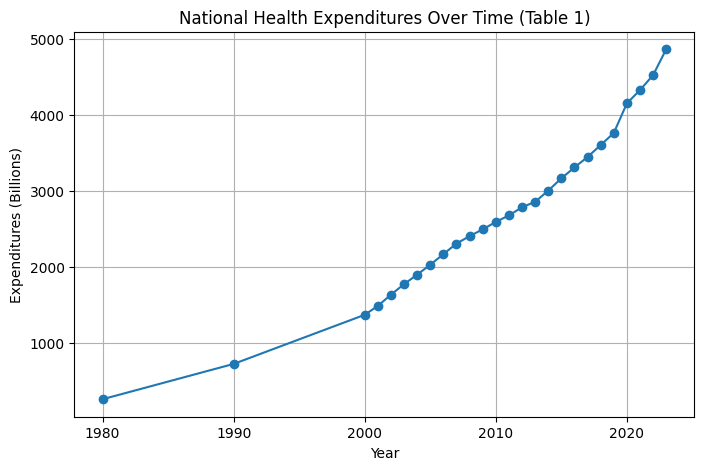

In [7]:
df_table1 = pd.read_excel("nhe23-tables/new table 1 total expenditures.xlsx")

# Sort by Year just in case
df_table1 = df_table1.sort_values("Year")

# Pick a column to plot, e.g. 'Nationa_Health_Expenditures _Billions'
plt.figure(figsize=(8,5))
plt.plot(df_table1["Year"], df_table1["Nationa_Health_Expenditures _Billions"], marker='o')
plt.title("National Health Expenditures Over Time (Table 1)")
plt.xlabel("Year")
plt.ylabel("Expenditures (Billions)")
plt.grid(True)
plt.show()

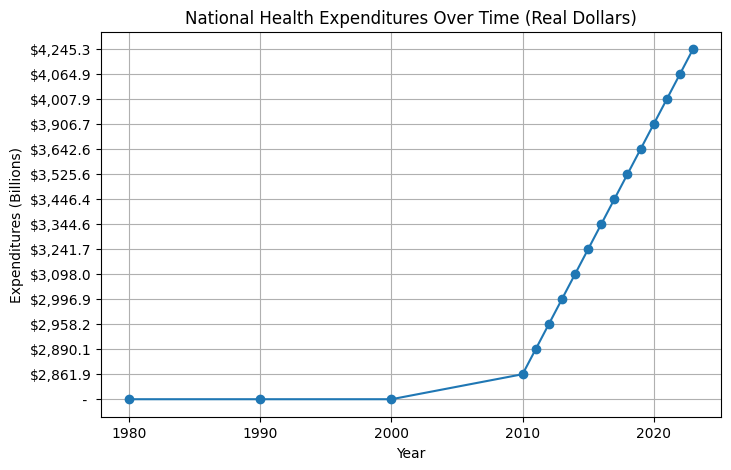

In [8]:
real_dollars_df = pd.read_csv('nhe23-tables/new book 23 real dollars 2017.csv')
real_dollars_df = real_dollars_df.sort_values("Year")

plt.figure(figsize=(8,5))
plt.plot(real_dollars_df["Year"], real_dollars_df["National_Health_Expenditures_Billions"], marker='o')
plt.title("National Health Expenditures Over Time (Real Dollars)")
plt.xlabel("Year")
plt.ylabel("Expenditures (Billions)")
plt.grid(True)
plt.show()

#### Comparison of Nominal vs. Real Dollar Expenditures

From the two plots:

1. **Nominal Expenditures (Table 1)**  
   - Shows a **steady upward trend** from roughly \$253.2 billion in **1980** to almost **\$5 trillion** by **2023**.  
   - The growth appears **smooth** and fairly **consistent** across the years, reflecting **both** true increases in health spending and **inflation** over time.

2. **Real Dollar Expenditures**  
   - Adjusted for inflation (e.g., to a constant year’s value).  
   - Remains **relatively flat** until around **2000**, then **accelerates sharply** in the 2000s and 2010s, reaching around **\$4.2 trillion** in 2023.  
   - This indicates that **even in constant dollars**, health expenditures have **increased significantly** since the early 2000s—just not as steadily as the nominal curve suggests.

### Key Observations

- **Inflation Effect**:  
  - The nominal plot rises more **gradually** (due to compounding inflation), whereas the real-dollar plot remains **lower** and more **compressed** in earlier decades, then **surges** later.  
  - This highlights how **inflation** can mask or exaggerate certain spending patterns when looking at raw dollars over multiple decades.

- **Implications for Analysis**:  
  - Using **nominal** dollars can overstate growth caused by **price inflation** rather than actual increases in **resource allocation**.  
  - **Real** dollars provide a **truer** sense of how much more (or less) healthcare resources are consumed over time.

- **Relevance to Research Questions**:  
  1. **Overall Spending vs. Mortality (Q1)**:  
     - Analyzing **real** expenditures might give a clearer picture of whether true resource increases correlate with changes in mortality.  
  2. **Subcategories and Specific Diseases (Q2)**:  
     - When comparing different spending types (e.g., hospital care, prescription drugs) to disease outcomes, using **real dollars** ensures a **fair comparison** across years.

In summary, **both** plots confirm the **major growth** in U.S. health expenditures, but the **real-dollar** plot is often more **reliable** for long-term trend analysis, avoiding the confounding effects of inflation.  


In [9]:
print(real_dollars_df.columns)
print(csv_data.columns)


Index(['Year', 'National_Health_Expenditures_Billions',
       'Personal_Health_Care_Billions', 'Hospital_Care_Billions',
       'Physician_and_Clinical_Services_Billions',
       'Other_Professional_Services_Billions', 'Dental_Services_Billions',
       'Other_Health_Residential_and_Personal_Care_Billions',
       'Home_Health_Care_Billions',
       'Nursing_Home_Facilities_and_Continuing_Care_Retirement_Communities_Billions',
       'Prescription_Drugs_Billions',
       'Other_Non-Durable_Medical_Products_Billions',
       'Durable_Medical_Equipment_Billions',
       'Government_Administration_Billions',
       'Net_Cost_of_Health_Insurance_Billions',
       'Government_Public_Health_Actitives_Billions', 'Research_Billions',
       'Structures_and_Equipment_Billions'],
      dtype='object')
Index(['measure_name', 'cause_id', 'cause_name', 'metric_name', 'year', 'val',
       'upper', 'lower'],
      dtype='object')


In [10]:
real_dollars_df['year'] = real_dollars_df['Year']
real_dollars_df = real_dollars_df.drop(columns=['Year'])
print(real_dollars_df.columns)

Index(['National_Health_Expenditures_Billions',
       'Personal_Health_Care_Billions', 'Hospital_Care_Billions',
       'Physician_and_Clinical_Services_Billions',
       'Other_Professional_Services_Billions', 'Dental_Services_Billions',
       'Other_Health_Residential_and_Personal_Care_Billions',
       'Home_Health_Care_Billions',
       'Nursing_Home_Facilities_and_Continuing_Care_Retirement_Communities_Billions',
       'Prescription_Drugs_Billions',
       'Other_Non-Durable_Medical_Products_Billions',
       'Durable_Medical_Equipment_Billions',
       'Government_Administration_Billions',
       'Net_Cost_of_Health_Insurance_Billions',
       'Government_Public_Health_Actitives_Billions', 'Research_Billions',
       'Structures_and_Equipment_Billions', 'year'],
      dtype='object')


In [11]:
# Filter for measure_name == "Deaths"
deaths_df = csv_data[csv_data["measure_name"] == "Deaths"].copy()

In [12]:
total_deaths_per_year = deaths_df.groupby("year", as_index=False)["val"].sum()
total_deaths_per_year.rename(columns={"val": "Total_Deaths"}, inplace=True)

In [13]:
import matplotlib.ticker as mtick

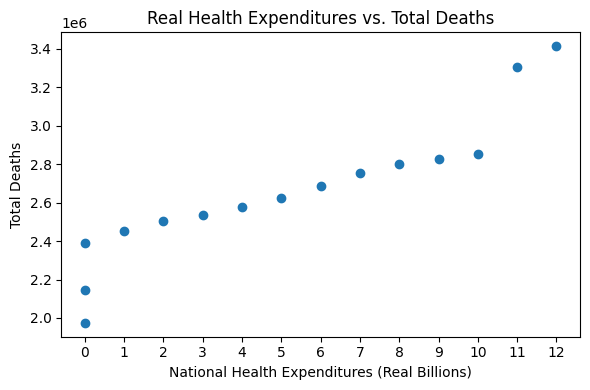

In [14]:
final_df = pd.merge(real_dollars_df, total_deaths_per_year, on="year", how="inner")

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(
    final_df["National_Health_Expenditures_Billions"],
    final_df["Total_Deaths"]
)
ax.set_title("Real Health Expenditures vs. Total Deaths")
ax.set_xlabel("National Health Expenditures (Real Billions)")
ax.set_ylabel("Total Deaths")

# use a StrMethodFormatter for thousands separators or currency
formatter = mtick.StrMethodFormatter('{x:,.0f}')  # e.g., "3,500"
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

#### Observations: Real Health Expenditures vs. Total Deaths

1. **Positive Relationship**  
   - As real health expenditures increase (x-axis), total deaths (y-axis) also rise, suggesting a **positive correlation** in this dataset.
   - The scatter points form a generally **upward-sloping** trend, indicating that years with higher spending also have higher total deaths.

2. **Axis Scaling**  
   - The x-axis ranges from **0 to ~12**—likely reflecting **trillions** of real dollars in a simplified scale or a transformed unit.  
   - The y-axis spans roughly **2.0×10^6** to **3.4×10^6** total deaths, showing an increase of around **1.4 million** deaths across the plotted time frame.

3. **Possible Explanations**  
   - **Population Growth**: As the U.S. population grows, both total spending and total deaths can rise in tandem.  
   - **Aging Demographics**: An older population often leads to higher death counts and increased healthcare spending.  
   - **Inflation Adjustment**: These expenditures are in **real (inflation-adjusted)** dollars, so the growth represents true increases in resource allocation rather than just price inflation.

4. **Limitations & Next Steps**  
   - **Correlation ≠ Causation**: A higher spending year does not necessarily *cause* more deaths. External factors (e.g., population size, disease prevalence) likely drive both spending and mortality trends.  
   - **Normalized Measures**: You might consider **per capita** expenditures or **age-standardized** mortality rates for a clearer insight into how spending tracks with health outcomes independent of population changes.  
   - **Subcategory Analysis**: If **Question 2** involves specific expenditure types (e.g., hospital care, prescription drugs), plotting them individually against cause-specific mortality may offer deeper insight.

Overall, this plot confirms a **positive association** between real health expenditures and total deaths over time, highlighting the complexity of interpreting healthcare spending trends alongside mortality.  
